# Introduction to neural networks classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the data
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


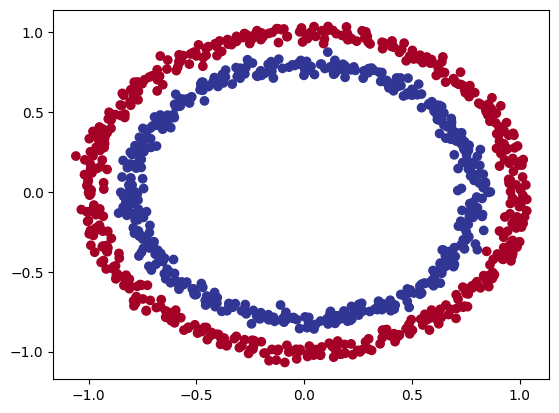

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of X and y
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with?
len(X), len(y)

(1000, 1000)

In [8]:
# View the first sample of features and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [10]:
# Create the model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), # input shape required
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 3s 2ms/step - loss: 4.3904 - accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.3126 - accuracy: 0.4762
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2944 - accuracy: 0.4450
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2307 - accuracy: 0.4200
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1269 - accuracy: 0.4137
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0424 - accuracy: 0.4025
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8889 - accuracy: 0.3988
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7627 - accuracy: 0.3975
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6338 - accuracy: 0.3975
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.5752 - accuracy: 0.3988
Epoch 11/

<AxesSubplot: >

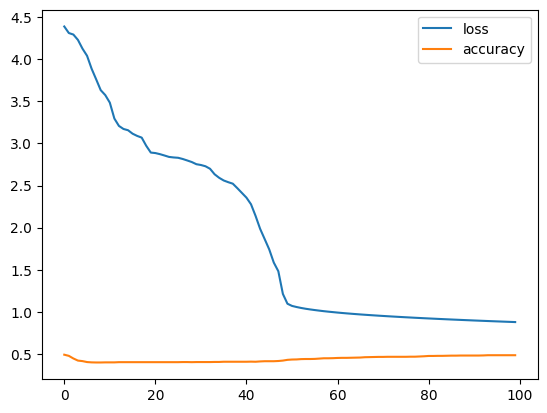

In [11]:
pd.DataFrame(history.history).plot()

In [12]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7951 - accuracy: 0.5400


[0.7951064109802246, 0.5400000214576721]

## Improving our model
Let's look into our bag of tricks and see if we can improve our model.
1. Create a model - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 2.3344 - accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7307 - accuracy: 0.4775
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.4250
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4450
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4963
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5088
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5275
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5075
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5250
Epoch 11/

In [14]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5450


[0.6945542097091675, 0.5450000166893005]

## Visualizing our model's predictions
To visualize our model predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones where each class falls

In [15]:
import numpy as np
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    * [cs231n course](http://cs231n.github.io/neural-networks-case-study/)
    * https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 724us/step
doing binary classification...


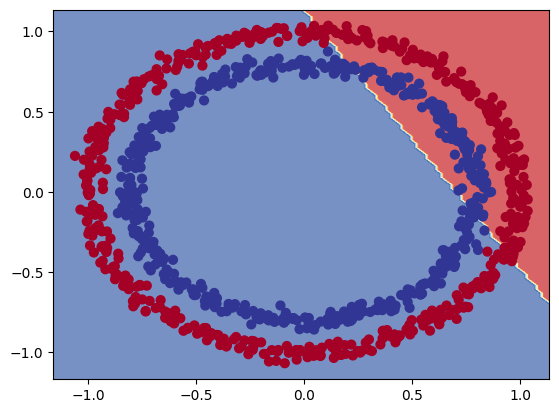

In [16]:
# Check out the decision boundary of our model_2
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [17]:
model_2.predict(X_test)

7/7 [==============================] - 0s 1ms/step


array([[0.5172171 ],
       [0.5012221 ],
       [0.5043851 ],
       [0.51485145],
       [0.4988571 ],
       [0.5047339 ],
       [0.5135898 ],
       [0.497466  ],
       [0.50172955],
       [0.5032587 ],
       [0.5156513 ],
       [0.50658596],
       [0.4959283 ],
       [0.49527428],
       [0.5001306 ],
       [0.51508534],
       [0.50604546],
       [0.508433  ],
       [0.49922866],
       [0.5151774 ],
       [0.5027498 ],
       [0.50800073],
       [0.50842917],
       [0.5104756 ],
       [0.49518573],
       [0.5040051 ],
       [0.49958184],
       [0.49792588],
       [0.51306343],
       [0.5083583 ],
       [0.50211465],
       [0.5162391 ],
       [0.51092154],
       [0.51198447],
       [0.51860017],
       [0.5130492 ],
       [0.50207543],
       [0.4951256 ],
       [0.5064964 ],
       [0.5150694 ],
       [0.5007418 ],
       [0.4978659 ],
       [0.5008478 ],
       [0.4976567 ],
       [0.51272076],
       [0.5185029 ],
       [0.5123599 ],
       [0.514

In [18]:
# Set random seed
tf.random.set_seed(42)

X_regression = tf.expand_dims(tf.range(0, 1000, 5), axis=1).numpy()
y_regression = tf.squeeze(X_regression + 10).numpy()

X_regression, y_regression

(array([[  0],
        [  5],
        [ 10],
        [ 15],
        [ 20],
        [ 25],
        [ 30],
        [ 35],
        [ 40],
        [ 45],
        [ 50],
        [ 55],
        [ 60],
        [ 65],
        [ 70],
        [ 75],
        [ 80],
        [ 85],
        [ 90],
        [ 95],
        [100],
        [105],
        [110],
        [115],
        [120],
        [125],
        [130],
        [135],
        [140],
        [145],
        [150],
        [155],
        [160],
        [165],
        [170],
        [175],
        [180],
        [185],
        [190],
        [195],
        [200],
        [205],
        [210],
        [215],
        [220],
        [225],
        [230],
        [235],
        [240],
        [245],
        [250],
        [255],
        [260],
        [265],
        [270],
        [275],
        [280],
        [285],
        [290],
        [295],
        [300],
        [305],
        [310],
        [315],
        [320],
        [325],
        [3

In [19]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression, y_regression, test_size=0.2)
X_regression_train.shape, y_regression_train.shape, X_regression_test.shape, y_regression_test.shape

((160, 1), (160,), (40, 1), (40,))

In [20]:
# fit model 2
model_2.fit(X_regression_train, y_regression_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (32, 1)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for binary classification, not regression. Let's fix that.

In [ ]:
# Creat a regression model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model, this time with a regression loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(X_regression_train, y_regression_train, epochs=100)

In [ ]:
# Evaluate the regression model
model_3.evaluate(X_regression_test, y_regression_test)

In [ ]:
# Make some predictions
y_regression_preds = model_3.predict(X_regression_test)

# Plot predictions against ground truth labels
plt.figure(figsize=(10, 7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Testing data")
plt.scatter(X_regression_test, y_regression_preds, c="r", label="Predictions")
plt.legend()


# The missing piece: Non-linearity

In [ ]:
# Create model with non-linearity
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), # input shape required
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, epochs=350)

In [ ]:
model_4.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model_4, X, y)

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
# Create a toy tensor (similar to the data we pass in to our models)
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

In [ ]:
plt.xticks(tf.range(0, 20))
plt.yticks(tf.range(-10, 10, 2))
plt.plot(A)

In [ ]:
# Let try to replicate the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [ ]:
# Plot our toy tensor transformed by the sigmoid function
plt.xticks(tf.range(0, 20))
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
    return tf.maximum(0, x)

In [ ]:
# Plot our toy tensor transformed by the relu function
plt.xticks(tf.range(0, 20))
plt.plot(relu(A))

In [ ]:
# Let's recreate a moeel to fit on the training data and evaluate on the test data

# Set the random seed
tf.random.set_seed(42)

# Create the model (same as model_4)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(X_train, y_train, epochs=100)


In [ ]:
# Evaluate the model
model_5.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.title("Training data")
plot_decision_boundary(model_5, X, y)
plt.subplot(1, 2, 2)
plt.title("Test data")
plot_decision_boundary(model_5, X_test, y_test)

In [ ]:
# Plot the loss curves
pd.DataFrame(history_5.history).plot()

🔑 **Note:** For many problems, the loss function going down means the model is improving (the preditctions it's making are getting closer to the ground truth labels).

## Finding The Best Learning Rate

To find the best learning rate for our model, we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as extra piece of functionality, you can add to your *while*  it's training.
* Another model (we could use the same one as above, but we're practicing creating models, so we'll make another one).
* A modified loss curve plots.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_5)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fit the model (passing in the lr_scheduler callback)
history_6 = model_6.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

In [ ]:
# Check out the learning rate of each step of training
pd.DataFrame(history_6.history).plot(figsize=(10, 7), xlabel="epochs")

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
print(len(lrs))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_6.history["loss"]) # semilogx plots x on a log scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
# Set random seed
tf.random.set_seed(42)

X_regression = tf.expand_dims(tf.range(0, 1000, 5), axis=1).numpy()
y_regression = tf.squeeze(X_regression + 10).numpy()

X_regression, y_regression

In [ ]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression, y_regression, test_size=0.2)
X_regression_train.shape, y_regression_train.shape, X_regression_test.shape, y_regression_test.shape

In [ ]:
# fit model 2
model_2.fit(X_regression_train, y_regression_train, epochs=100)

Oh wait... we compiled our model for binary classification, not regression. Let's fix that.

In [ ]:
# Creat a regression model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model, this time with a regression loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(X_regression_train, y_regression_train, epochs=100)

In [ ]:
# Evaluate the regression model
model_3.evaluate(X_regression_test, y_regression_test)

In [ ]:
# Make some predictions
y_regression_preds = model_3.predict(X_regression_test)

# Plot predictions against ground truth labels
plt.figure(figsize=(10, 7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Testing data")
plt.scatter(X_regression_test, y_regression_preds, c="r", label="Predictions")
plt.legend()


# The missing piece: Non-linearity

In [ ]:
# Create model with non-linearity
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), # input shape required
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, epochs=350)

In [ ]:
model_4.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model_4, X, y)

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
# Create a toy tensor (similar to the data we pass in to our models)
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

In [ ]:
plt.xticks(tf.range(0, 20))
plt.yticks(tf.range(-10, 10, 2))
plt.plot(A)

In [ ]:
# Let try to replicate the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [ ]:
# Plot our toy tensor transformed by the sigmoid function
plt.xticks(tf.range(0, 20))
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
    return tf.maximum(0, x)

In [ ]:
# Plot our toy tensor transformed by the relu function
plt.xticks(tf.range(0, 20))
plt.plot(relu(A))

## More classification evaluation methods
Alongside visualizing our models results as mush as possible, there are a number of classification evaluation methods we can use to evaluate our models.

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy * 100):.2f}%")

How about confusion matrix?